In [16]:
import tensorflow as tf
import matplotlib.pyplot as plt

tf.__version__

'2.13.0'

In [17]:
# 28x28 sized images of handwritten digits (0-9)
dataset = tf.keras.datasets.mnist

In [18]:
# the load_data() function returns two tuples - one for training set and one for test set
# each tuple then has the data's images and labels
(X_train, y_train), (X_test, y_test) = dataset.load_data()

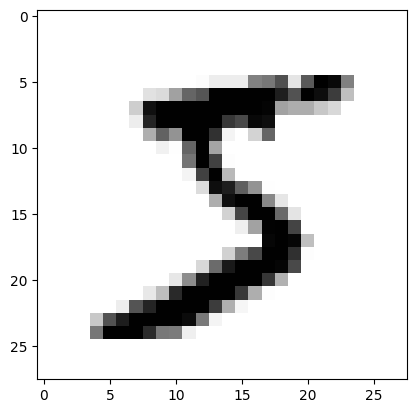

In [22]:
plt.imshow(X_train[0], cmap=plt.cm.binary)  # imshow - displaying data as an image
plt.show()

# cmap=plt.cm.binary -> to set color map to black and white

In [23]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [24]:
# normalizing the data (for pixel data, it goes from 0 to 255)
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

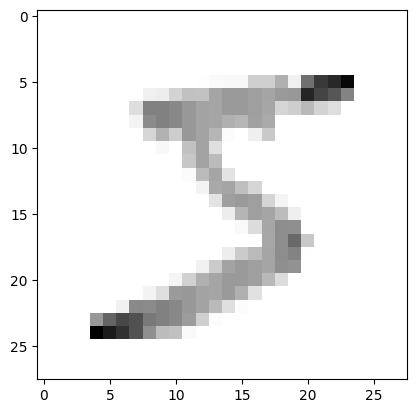

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [26]:
plt.imshow(X_train[0], cmap=plt.cm.binary)  # imshow - displaying data as an image
plt.show()
print(X_train[0])

In [28]:
# building the model

model = tf.keras.models.Sequential()
# adding the layers - we want the images to be single dimension (flattened) instead of 
# multidimensional (we can use numpy reshape or the keras layer called Flatten)

model.add(tf.keras.layers.Flatten())                            # input layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))    # hidden layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))    # hidden layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # output layer

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'] )

In [29]:
# training the model
model.fit(X_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2612 - accuracy: 0.9238
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1081 - accuracy: 0.9666
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0732 - accuracy: 0.9765


In [30]:
# calculate validation loss and accuracy
val_loss, val_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1064 - accuracy: 0.9663


In [31]:
print(val_loss, val_accuracy)

0.10644465684890747 0.9663000106811523


In [32]:
# saving the model
model.save('handwriting_recognition.model')

INFO:tensorflow:Assets written to: handwriting_recognition.model\assets


INFO:tensorflow:Assets written to: handwriting_recognition.model\assets


In [34]:
new_model = tf.keras.models.load_model('handwriting_recognition.model')

In [35]:
# making predictions
preds = new_model.predict([X_test])

313/313 [==============================] - 1s 2ms/step


In [37]:
import numpy as np
print(np.argmax(preds[0]))

7


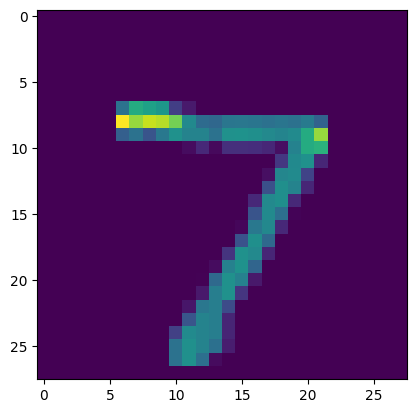

In [39]:
plt.imshow(X_test[0])
plt.show()

1
1/1 [==============================] - 0s 88ms/step
num is 1 


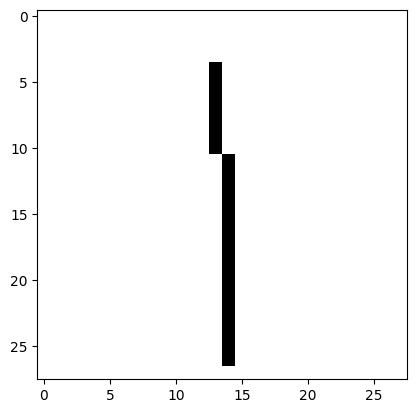

2
1/1 [==============================] - 0s 38ms/step
num is 4 


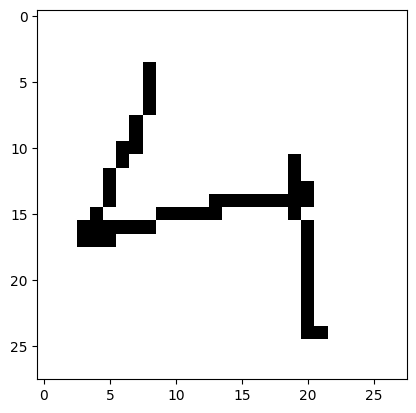

3
1/1 [==============================] - 0s 41ms/step
num is 2 


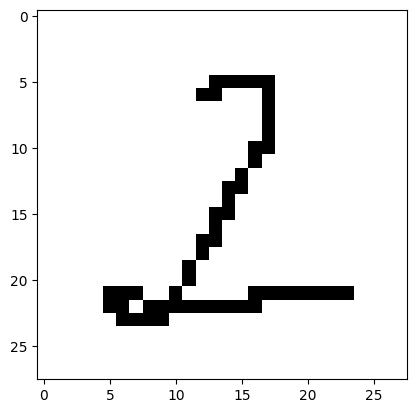

4
1/1 [==============================] - 0s 44ms/step
num is 3 


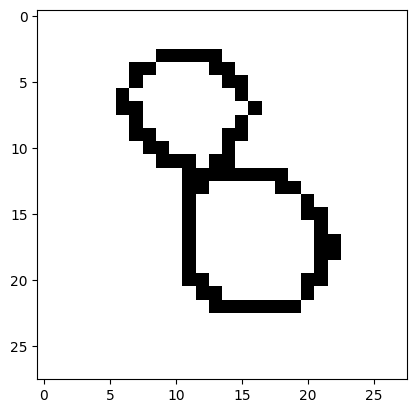

5
1/1 [==============================] - 0s 40ms/step
num is 3 


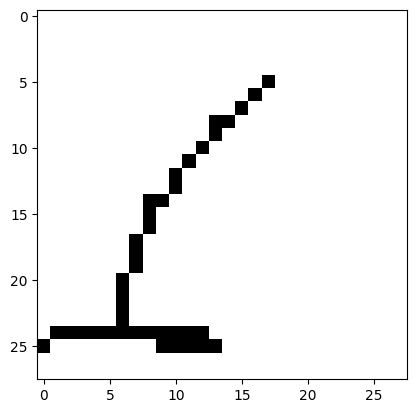

In [53]:
# loading custom dataset for digits (digit_dataset)
import os
import cv2
digit_num = 1
while os.path.isfile(f"digits_dataset/digit{digit_num}.png"):
    print(digit_num)
    try:
        img = cv2.imread(f"digits_dataset/digit{digit_num}.png")[:,:,0]
        img = np.invert(np.array([img])) # inverting colors of image
        prediction = model.predict(img)
        print(f"num is {np.argmax(prediction)} ")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print("Error")
    finally:
        digit_num = digit_num + 1
